قسمت 3

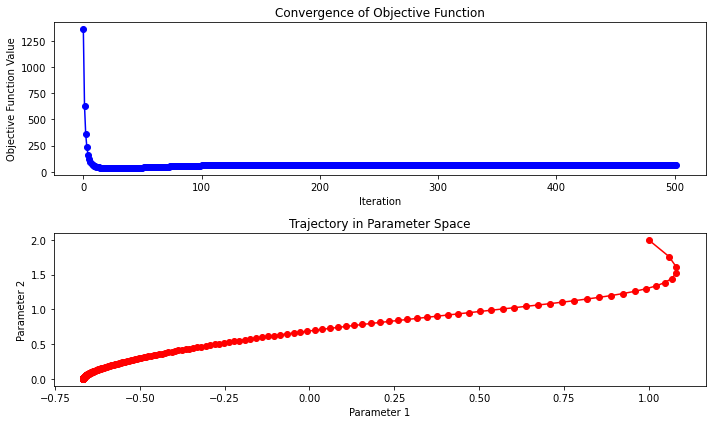

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
n = 2
a = -2
b = 150
To = np.array([1, 2])  # Initial guess

# Objective function
def objective_function(x):
    result = 0
    for i in range(1, n):
        result += b*(x[i] ** 2 - x[i - 1]) ** 2 + (x[i - 1] - a) ** 2
    return result

# Gradient of the objective function
def gradient(x):
    grad = np.zeros_like(x)
    for i in range(1, n):
        grad[i] += 4 * x[i] * (x[i] ** 2 - x[i - 1])  # Derivative wrt xi
        grad[i - 1] += -4 * (x[i] ** 2 - x[i - 1]) + 2 * (x[i - 1] - a)  # Derivative wrt xi-1
    return grad

# Golden section algorithm for line search
def golden_section_search(func, a, b, tol=1e-5):
    phi = (1 + np.sqrt(5)) / 2 - 1  # Golden ratio

    # Initial points
    x1 = b - phi * (b - a)
    x2 = a + phi * (b - a)

    while abs(b - a) > tol:
        if func(x1) < func(x2):
            b = x2
        else:
            a = x1

        x1 = b - phi * (b - a)
        x2 = a + phi * (b - a)

    return (a + b) / 2

def gradient_descent_track_trajectory(func, gradient, initial_point, learning_rate=0.01, tol=1e-5, max_iter=1000):
    x = initial_point
    trajectory = [x.copy()]  # Store the trajectory for plotting
    convergence = [func(x)]  # Store the objective function value for convergence

    for iteration in range(max_iter):
        grad = gradient(x)
        x = x - learning_rate * grad

        trajectory.append(x.copy())
        convergence.append(func(x))

        if np.linalg.norm(grad) < tol:
            break

    return x, trajectory, convergence

# Apply gradient descent to find the minimum point and track trajectory
min_point, trajectory, convergence = gradient_descent_track_trajectory(
    objective_function, gradient, To
)

# Plotting trajectories
plt.figure(figsize=(10, 6))

# Plot objective function values during optimization
plt.subplot(2, 1, 1)
plt.plot(convergence, marker='o', linestyle='-', color='b')
plt.title('Convergence of Objective Function')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

# Plot trajectory in the parameter space
trajectory = np.array(trajectory)
plt.subplot(2, 1, 2)
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', linestyle='-', color='r')
plt.title('Trajectory in Parameter Space')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')

plt.tight_layout()
plt.show()

In [8]:
# Apply golden section algorithm to find the minimum along each dimension
x_min = np.zeros(n)
for i in range(n):
    line_search_func = lambda alpha, i=i: objective_function(np.insert(x_min, i, alpha))
    x_min[i] = golden_section_search(line_search_func, -b, b)

# Apply gradient descent to find the minimum point
min_point = gradient_descent(objective_function, gradient, To)

print("Minimum Point (Golden Section Algorithm):", x_min)
print("Minimum Point (Gradient Descent Algorithm):", min_point)
print("Minimum Value:", objective_function(min_point))

Minimum Point (Golden Section Algorithm): [-1.32444809e-02 -1.63392164e-14]
Minimum Point (Gradient Descent Algorithm): [-6.66666667e-01  3.59008911e-06]
Minimum Value: 68.44444443361408


Minimum point (step size = 0.001 ): [2.52367848 1.68418223 1.34961929]
Number of iterations: 1000
Minimum point (step size = 0.01 ): [2.24550623 1.57829402 1.2984769 ]
Number of iterations: 959


<ipython-input-9-ebc6bcfb08e3>:73: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, Z, levels=50, cmap='viridis')


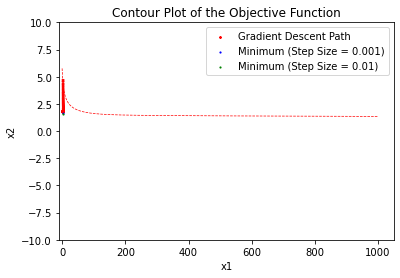

D:\Users\Asus\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


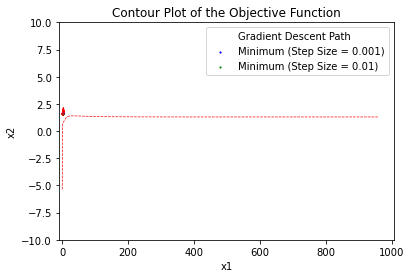

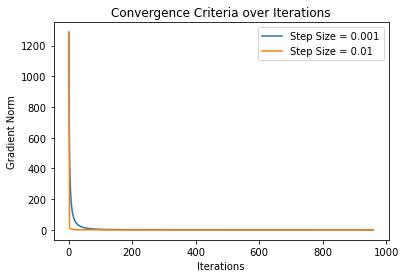

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, a):
    result = 0
    for i in range(1, len(x)):
        result += (x[i] ** 2 - x[i - 1]) ** 2 + (x[i - 1] - a) ** 2
    return result

def gradient(x, a):
    grad = np.zeros_like(x)
    grad[0] = 2 * (x[0] - a)
    for i in range(1, len(x)):
        grad[i] = 4 * x[i] * (x[i] ** 2 - x[i - 1]) + 2 * (x[i] - x[i - 1])
        grad[i - 1] -= 2 * (x[i] ** 2 - x[i - 1])
    return grad

def gradient_descent(initial_x, a, step_size, max_iterations, tolerance):
    x = initial_x
    iterations = 0
    history = []
    gradient_norms = []

    for i in range(max_iterations):
        grad = gradient(x, a)
        x = x - step_size * grad

        # Convergence check based on the norm of the gradient
        gradient_norm = np.linalg.norm(grad)
        gradient_norms.append(gradient_norm)

        if gradient_norm < tolerance:
            break

        # Store the history for contour plotting
        history.append(x.copy())
        iterations += 1

    return x, iterations, history, gradient_norms

# Given values
a = 2
initial_x = np.array([3, 5, 7])  # Update the initial point according to the dimension of the new function

# Convergence criteria
tolerance = 1e-6

# Maximum number of iterations
max_iterations = 1000

# Step sizes
step_size1 = 0.001
step_size2 = 0.01

# Perform gradient descent with different step sizes
min_point1, iterations1, history1, gradient_norms1 = gradient_descent(initial_x, a, step_size1, max_iterations, tolerance)
min_point2, iterations2, history2, gradient_norms2 = gradient_descent(initial_x, a, step_size2, max_iterations, tolerance)

print("Minimum point (step size =", step_size1, "):", min_point1)
print("Number of iterations:", iterations1)
print("Minimum point (step size =", step_size2, "):", min_point2)
print("Number of iterations:", iterations2)

# Contour plotting
def plot_contour(a, history):
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(1, len(x)):
        Z += (X[:, i] ** 2 - X[:, i - 1]) ** 2 + (X[:, i - 1] - a) ** 2

    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.scatter(*zip(*history), color='red', marker='x', label='Gradient Descent Path')
    plt.plot(*zip(*history), color='red', linestyle='dashed', linewidth=0.7)
    plt.scatter(*min_point1, color='blue', marker='o', label='Minimum (Step Size = 0.001)')
    plt.scatter(*min_point2, color='green', marker='o', label='Minimum (Step Size = 0.01)')
    plt.title('Contour Plot of the Objective Function')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Plot contours and the optimization path
plot_contour(a, history1)
plot_contour(a, history2)

# Plot convergence criteria over iterations
plt.figure()
min_iterations = min(iterations1, iterations2)
plt.plot(range(1, min_iterations + 1), gradient_norms1[:min_iterations], label='Step Size = 0.001')
plt.plot(range(1, min_iterations + 1), gradient_norms2[:min_iterations], label='Step Size = 0.01')
plt.xlabel('Iterations')
plt.ylabel('Gradient Norm')
plt.title('Convergence Criteria over Iterations')
plt.legend()
plt.show()
